In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar los datos
cleaned_data_path = './data/students_reduced.csv'
cleaned_data = pd.read_csv(cleaned_data_path)


C:\Users\rogel\AppData\Local\Temp\ipykernel_28456\154574169.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv(cleaned_data_path)


In [2]:
# Identificar columnas categóricas y numéricas
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = cleaned_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Aplicar Label Encoding a columnas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col].astype(str))
    label_encoders[col] = le


In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns excluding the target column 'retention'
numerical_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns.drop('retention')

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
cleaned_data[numerical_cols] = scaler.fit_transform(cleaned_data[numerical_cols])


# Guardar los datos limpios
cleaned_data.to_csv('./data/label_encoded_scaled_data.csv', index=False)


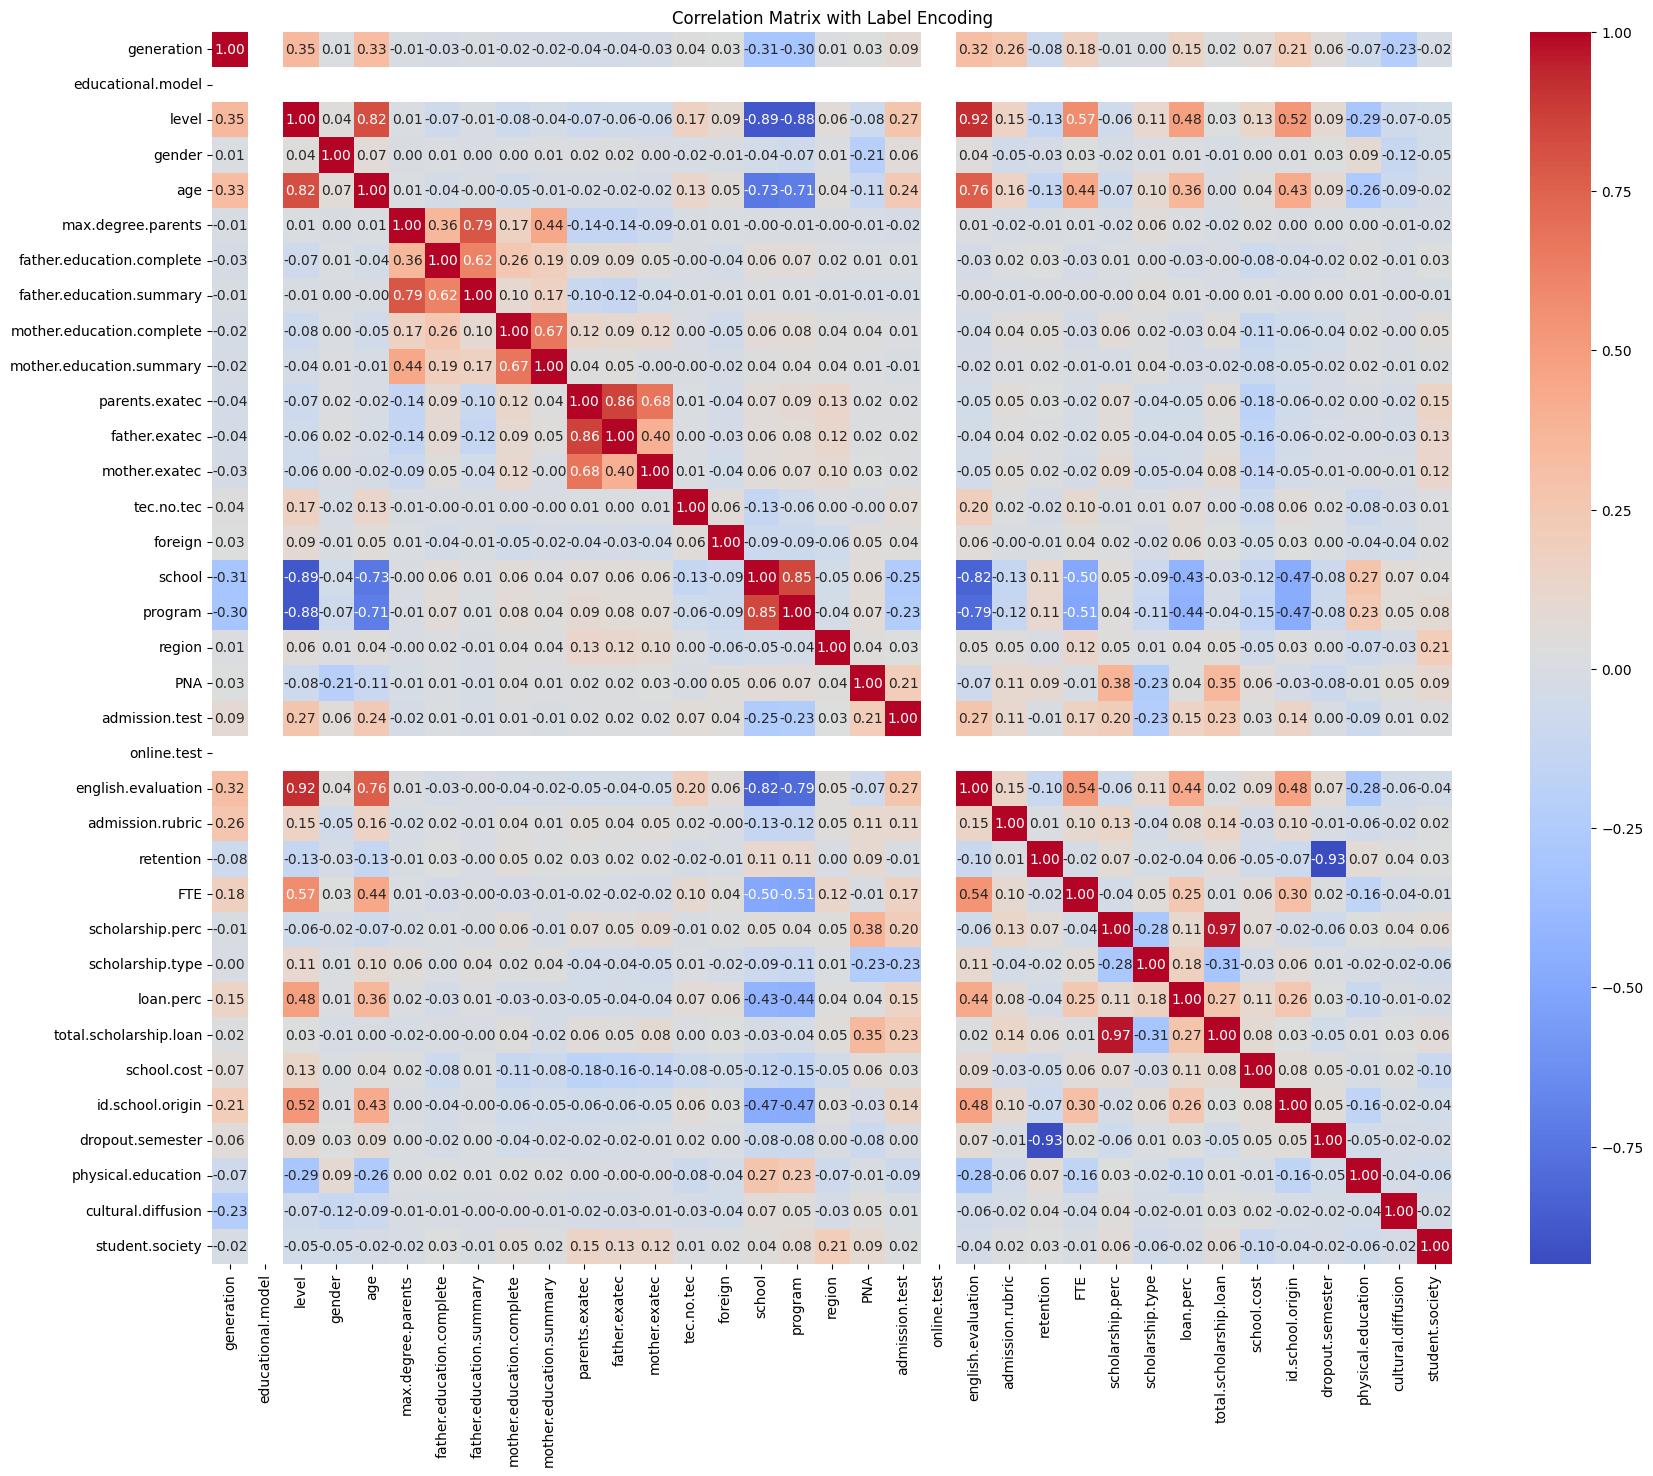

In [5]:
# Calcular la matriz de correlación
correlation_matrix = cleaned_data.corr()

import matplotlib.pyplot as plt
import seaborn as sns

# Plotear la matriz de correlación
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Label Encoding')
plt.show()


In [6]:
# Guardar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
cleaned_data.to_csv(processed_data_path, index=False)


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)


# Verificar tipos de datos y valores NA
data_types_processed = processed_data.dtypes
na_values_processed = processed_data.isna().sum()

# Mostrar resultados
print("Data Types:\n", data_types_processed)
print("NA Values:\n", na_values_processed)


Data Types:
 generation                     int64
educational.model            float64
level                          int64
gender                         int64
age                          float64
max.degree.parents             int64
father.education.complete      int64
father.education.summary       int64
mother.education.complete      int64
mother.education.summary       int64
parents.exatec                 int64
father.exatec                  int64
mother.exatec                  int64
tec.no.tec                     int64
foreign                        int64
school                         int64
program                        int64
region                         int64
PNA                            int64
admission.test                 int64
online.test                  float64
english.evaluation           float64
admission.rubric             float64
retention                      int64
FTE                            int64
scholarship.perc               int64
scholarship.type         